In [ ]:
  pip install pandas scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving legitimate-urls.csv to legitimate-urls.csv


In [ ]:
legitimate_urls = pd.read_csv("legitimate-urls.csv")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving phishing-urls.csv to phishing-urls.csv


In [ ]:
phishing_urls = pd.read_csv("phishing-urls.csv")

In [ ]:
legitimate_urls['label'] = 0  # 0 for legitimate
phishing_urls['label'] = 1     # 1 for phishing
urls = pd.concat([legitimate_urls, phishing_urls])

In [ ]:
print(urls.head())


                     Domain  Having_@_symbol  Having_IP  \
0  www.liquidgeneration.com                0          0   
1       www.onlineanime.org                0          0   
2       www.ceres.dti.ne.jp                0          0   
3            www.galeon.com                0          0   
4       www.fanworkrecs.com                0          0   

                          Path  Prefix_suffix_separation Protocol  \
0                            /                         0     http   
1                            /                         0     http   
2  /~nekoi/senno/senfirst.html                         0     http   
3                        /kmh/                         0     http   
4                            /                         0     http   

   Redirection_//_symbol  Sub_domains  URL_Length  age_domain  dns_record  \
0                      0            0           0           0           0   
1                      0            0           0           0           0   

In [ ]:
print(urls.tail())

                                Domain  Having_@_symbol  Having_IP  \
993                 www.guzheng.com.my                0          0   
994                    www.ioam.org.cn                0          0   
995           theparlourbeautyrooms.ie                0          0   
996  loogin-facebook-settinggst.esy.es                0          0   
997      halpcenter-acontscheck.esy.es                0          0   

                                                  Path  \
993  /libraries/joomla/session/storage/regional/2f8...   
994  /plugins/system/AtendimentoCliente-98.890.332_...   
995                                /dehl/Yah/T/Y1.html   
996                                    /confirmations/   
997                     /recovery-chekpoint-login.html   

     Prefix_suffix_separation Protocol  Redirection_//_symbol  Sub_domains  \
993                         0     http                      0            1   
994                         0     http                      0            1

In [ ]:
urls['Domain'] = urls['Domain'].apply(len)

In [ ]:
# Sample list of URLs
urls = [
    'https://www.example.com/ex/1',
    'https://www.phishing-example.com/login',
    'http://www.legitimate-site.com/home'
]

# Print each URL
for url in urls:
    print(url)


https://www.example.com/ex/1
https://www.phishing-example.com/login
http://www.legitimate-site.com/home


In [ ]:
df_urls = urls  # Store the list of URLs in df_urls if needed
urls = pd.concat([legitimate_urls, phishing_urls])  # Reassign urls to the DataFrame

# ... (Rest of your code to extract features and labels) ...

features = urls[['Domain']]  # Now this will work correctly on the DataFrame
labels = urls['label']
data_train, data_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=110)

In [ ]:
# List of known phishing URLs (for demonstration purposes)
known_phishing_urls = [
    'reveal.ru',
    'conti.ru',
    'nso.il',
    'double-dragon.cn'
]

def is_phishing_url(url):
    # Extract the domain from the URL
    domain = url.split("//")[-1].split("/")[0]  # Get the domain part of the URL

    # Check if the domain is in the list of known phishing URLs
    if domain in known_phishing_urls:
        return True
    else:
        return False

# Input: Prompt user for a URL
input_url = input("Enter the URL to check: ")

# Check if the URL is a phishing URL
if is_phishing_url(input_url):
    print("Be aware: This URL is a known phishing URL.")
else:
    print("This URL does not appear to be a phishing URL.")


Enter the URL to check: https://www.youtube.com/
This URL does not appear to be a phishing URL.


In [ ]:
import socket

def get_ip_address(url):
    try:
        # Remove the protocol (http://, https://) and extract the hostname
        domain_name = url.replace('http://', '').replace('https://', '').split('/')[0]

        # Get the IP address using gethostbyname()
        ip_address = socket.gethostbyname(domain_name)

        return ip_address
    except socket.gaierror as e:
        return f"Error resolving hostname: {e}"

# Input: Prompt user for a URL
input_url = input("Enter the URL to get its IP address: ")

# Get the IP address of the entered URL
ip = get_ip_address(input_url)

# Output the result
print(f"The IP address of {input_url} is: {ip}")


Enter the URL to get its IP address: https://www.youtube.com/
The IP address of https://www.youtube.com/ is: 173.194.203.91


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Combine DataFrames and add labels
legitimate_urls['label'] = 0  # 0 for legitimate
phishing_urls['label'] = 1  # 1 for phishing
urls = pd.concat([legitimate_urls, phishing_urls])

# Extract features (e.g., domain length)
urls['DomainLength'] = urls['Domain'].apply(len) # Create a new column for the feature

# Split into training and testing sets
features = urls[['DomainLength']]  # Use the numerical 'DomainLength' feature
labels = urls['label']
data_train, data_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=110)

# Create and train the model
model = RandomForestClassifier()
model.fit(data_train, labels_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
predictions = model.predict(data_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)

# Print accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print(classification_report(labels_test, predictions))


Model Accuracy: 61.32%
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       313
           1       0.61      0.56      0.58       292

    accuracy                           0.61       605
   macro avg       0.61      0.61      0.61       605
weighted avg       0.61      0.61      0.61       605



In [ ]:
def extract_features(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    path = parsed_url.path

    features = {
        'url_length': len(url),
        'domain_length': len(domain),
        'subdomain_count': domain.count('.') - 1,
        'path_length': len(path),
        'has_https': int(parsed_url.scheme == 'https'),
        'special_char_count': len(re.findall(r'[@\-_.]', url)),
        'contains_ip': int(bool(re.search(r'\d+\.\d+\.\d+\.\d+', url))),
        'suspicious_word_count': sum(word in url for word in ['login', 'secure', 'update', 'account']),
        'query_param_length': len(parsed_url.query),
        # Add more features as needed
    }

    return features


Model Accuracy: 61.32%
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       313
           1       0.61      0.56      0.58       292

    accuracy                           0.61       605
   macro avg       0.61      0.61      0.61       605
weighted avg       0.61      0.61      0.61       605



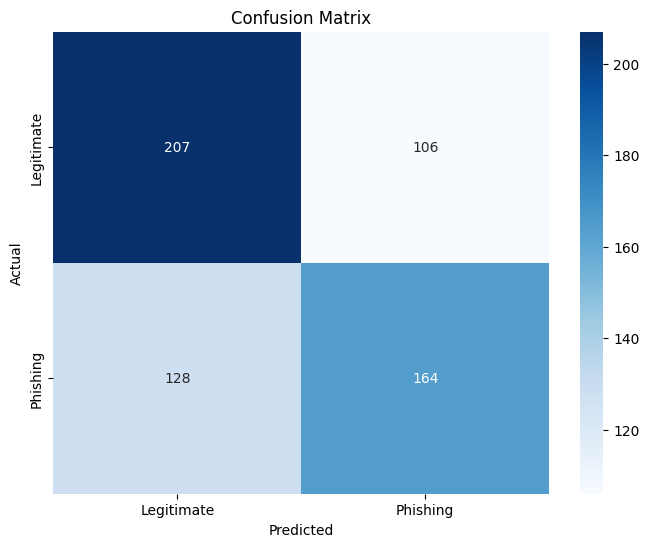

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(data_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print(classification_report(labels_test, predictions))

# Confusion Matrix Visualization
cm = confusion_matrix(labels_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
